In [198]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [199]:
df = pd.read_csv(r"Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [200]:
print(df['mainroad'].unique())

['yes' 'no']


In [201]:
#sns.pairplot(df, x_vars=[ 'area', 'bedrooms','stories' ], y_vars = 'price', size = 4, kind = 'scatter' )
#plt.show()

In [202]:
df['guestroom'] = df['guestroom'].map({"yes": 1, "no": 0})
df['mainroad'] = df['mainroad'].map({"yes": 1, "no": 0})
df['prefarea'] = df['prefarea'].map({"yes": 1, "no": 0})
df['hotwaterheating'] = df['hotwaterheating'].map({"yes": 1, "no": 0})
df['basement'] = df['basement'].map({"yes": 1, "no": 0})
df['airconditioning'] = df['airconditioning'].map({"yes": 1, "no": 0})
df['furnishingstatus'] = df['furnishingstatus'].map({"furnished": 1, "semi-furnished": 2, "unfurnished": 3})
#df['guestroom']=df['guestroom'].astype('category')
#df['guestroom']=df['guestroom'].cat.codes
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [203]:
x = df.drop(columns=['price'])
y = df['price']

In [204]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=187)

In [205]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [206]:
c=lr.intercept_
c

137087.02806409635

In [207]:
m=lr.coef_
m

array([ 2.54367699e+02,  1.20942181e+05,  9.94952736e+05,  4.20681698e+05,
        4.24971890e+05,  3.04620893e+05,  3.23544495e+05,  8.89709317e+05,
        9.14839020e+05,  3.37384701e+05,  7.10597153e+05, -1.56197698e+05])

In [208]:
y_pred_train=lr.predict(xtrain)
y_pred_train

array([ 7762784.38411218,  3463733.31824674,  3348695.39598434,
        4957625.11785856,  2979103.73347874,  5402110.57886328,
        2213635.08879694,  4915427.86003099,  4500162.25127524,
        3114038.33699648,  3747809.26272681,  4949871.95842817,
        6432464.99837874,  3827121.976515  ,  3404195.34614859,
        4947200.0742388 ,  4282139.83168206,  4925519.38118233,
        7714695.40356182,  3129766.61330872,  4367607.66500717,
        2499560.31297242,  5165354.42736485,  5523537.59400567,
       10758295.39003644,  7012505.9219698 ,  8329194.41472863,
        6248749.01307296,  6554407.40765746,  2989278.44143728,
        3170465.44514284,  2979458.5052928 ,  6560376.97706398,
        5047935.99101647,  5699201.11634248,  3246418.60358259,
        5995071.31568665,  3907053.74195   ,  3093569.19801222,
        7684534.76812254,  3577186.02474424,  4434638.64720952,
        4297244.09576012,  3963890.76501008,  5105960.59300718,
        5429019.50547161,  4010732.93414

Text(0, 0.5, 'Predicted')

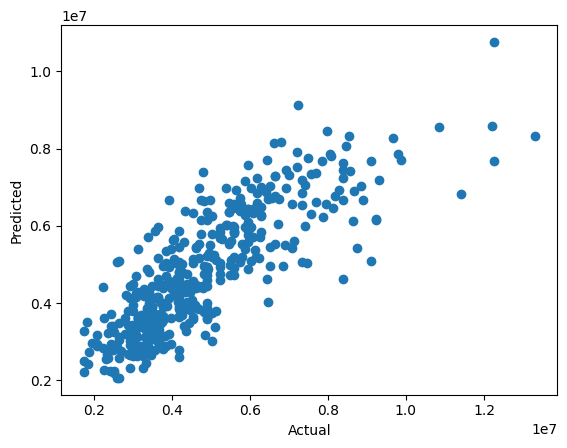

In [209]:
plt.scatter(ytrain,y_pred_train)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [210]:
from sklearn.metrics import r2_score
r2_score(ytrain,y_pred_train)

0.6778276392285192

In [211]:
y_pred_test=lr.predict(xtest)
y_pred_test


array([8059564.65382755, 7357668.13646141, 6779058.3566918 ,
       3480684.97475286, 5256926.79899163, 4046732.86648972,
       5164462.29856429, 6096994.31386022, 4849094.17486234,
       3271924.14268768, 4924360.72013647, 3762318.52123989,
       3200632.4177692 , 2666708.33807034, 2676883.04602887,
       4281901.46284188, 7033346.31012915, 6562589.04617341,
       3624959.96379971, 4537004.15719668, 4306890.76884325,
       2089115.82908972, 7036894.86213894, 2647323.55428111,
       4352102.16667783, 2836599.41592881, 4537453.38991229,
       7219749.94492285, 5724339.37145389, 3874059.6744834 ,
       3221050.60289502, 6403756.85557198, 4224918.31719619,
       5776855.09177569, 8193053.89374084, 5107038.95215186,
       3363784.89635494, 5961406.69770747, 4151966.12531056,
       2610887.81066623, 2671795.6920496 , 4046930.3494395 ,
       4138907.10609888, 3834989.24594835, 3659316.4518092 ,
       7105062.28860799, 6439828.94936147, 4156944.41616463,
       5673023.93099462,

Text(0, 0.5, 'Predicted')

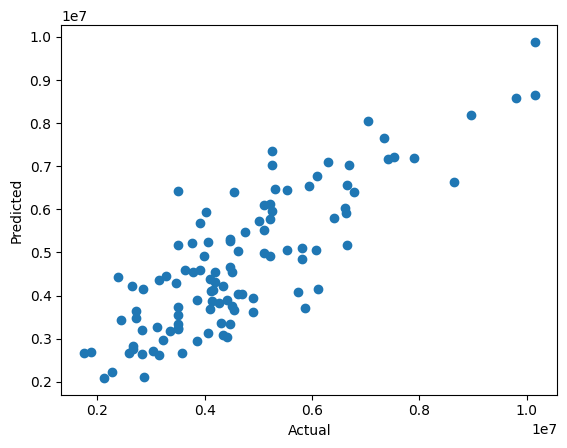

In [212]:
plt.scatter(ytest,y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [213]:
r2_score(ytest,y_pred_test)

0.6774738440679531